In [238]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [239]:
filename = "loan.csv"
loanData = pd.read_csv(filename, delimiter=",")
loanData.shape

(2260668, 145)

In [240]:
loanData.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


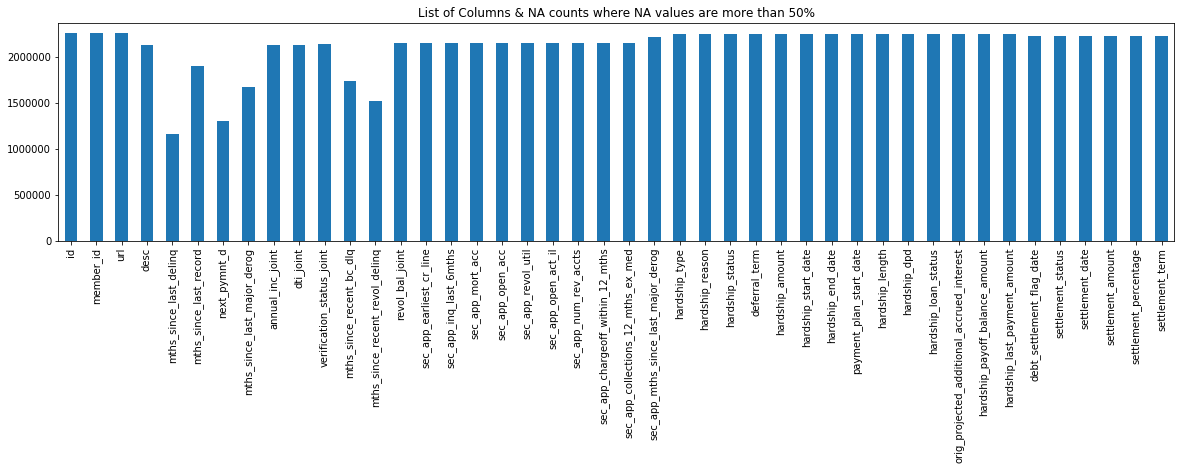

In [241]:
numofNAsPerCol = loanData.isnull().sum()
na_cols = numofNAsPerCol[numofNAsPerCol.values >(0.5*len(loanData))]
plt.figure(figsize=(20,4))
na_cols.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

Dropping these columns

In [242]:
na_cols_names = list(na_cols.index)
loanDataCleaned = loanData.copy()
loanDataCleaned.drop(labels = na_cols_names,axis =1,inplace=True)
print("Number of Columns dropped\t: ",len(na_cols))
print("\nOld dataset rows,columns",loanData.shape,"\nNew dataset rows,columns",loanDataCleaned.shape)

Number of Columns dropped	:  44

Old dataset rows,columns (2260668, 145) 
New dataset rows,columns (2260668, 101)


In [243]:
unique = loanDataCleaned.nunique()
unique1 = unique[unique.values == 1]
unique1

policy_code    1
dtype: int64

Dropping columns which have only 1 unique value

In [244]:
loanDataCleaned.drop(labels = list(unique1.index), axis =1, inplace=True)
print("Now remaining rows and columns are: " + str(loanDataCleaned.shape))

Now remaining rows and columns are: (2260668, 100)


In [245]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loanDataCleaned[numeric_columns] = loanDataCleaned[numeric_columns].apply(pd.to_numeric)

Zipcode has 'xx' at the end, therefore it would not add any value to our prediction and hence dropping it

In [246]:
colsToRemove=['zip_code']
loanDataCleaned.drop(labels = colsToRemove, axis =1, inplace=True)

## Analyzing one variable at a time
Analyzing few important variables just to get an idea of their distributions

In [247]:
def univ_Continuous(df, col):
    df[col].plot(kind='box')
    plt.show()
    df[col].plot.kde()
    plt.show()

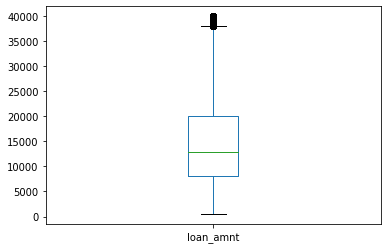

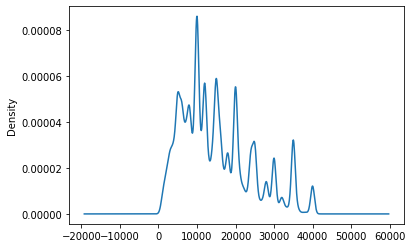

In [248]:
univ_Continuous(loanDataCleaned, 'loan_amnt')

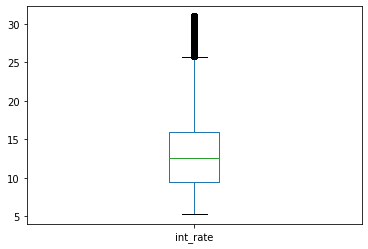

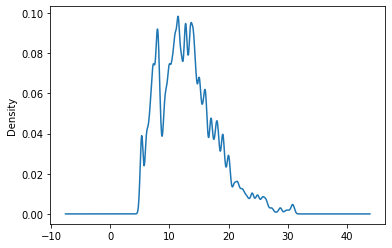

In [249]:
univ_Continuous(loanDataCleaned, 'int_rate')

In [250]:
loanDataCleaned["annual_inc"].describe()

count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

Remove Outliers as max value is much larger than the mean

In [251]:
q = loanDataCleaned["annual_inc"].quantile(0.995)
loanDataCleaned = loanDataCleaned[loanDataCleaned["annual_inc"] < q]
loanDataCleaned["annual_inc"].describe()

count    2.249274e+06
mean     7.533096e+04
std      4.328655e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      3.499920e+05
Name: annual_inc, dtype: float64

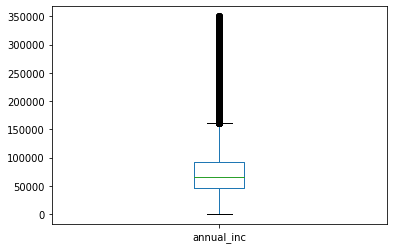

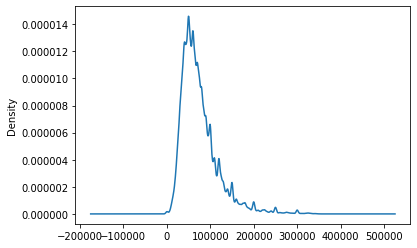

In [252]:
univ_Continuous(loanDataCleaned, 'annual_inc')

In [253]:
loanDataCleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'tota

In [254]:
def univ_Categorical(df, col):
    df[col].value_counts().plot(kind='bar')

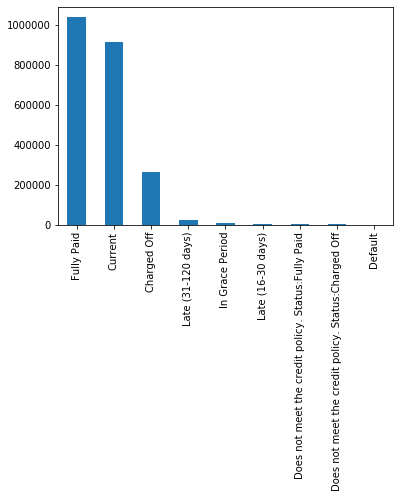

In [255]:
univ_Categorical(df=loanDataCleaned,col='loan_status')

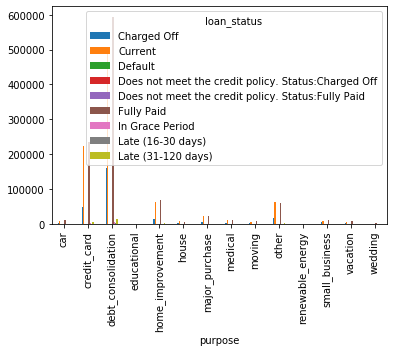

In [256]:
res = pd.crosstab(loanDataCleaned['purpose'], loanDataCleaned['loan_status'])
res.plot(kind='bar')

In [257]:
loanDataCleaned.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [258]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loanDataCleaned.drop(loanDataCleaned[loanDataCleaned['home_ownership'].isin(rem)].index,inplace=True)
loanDataCleaned.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

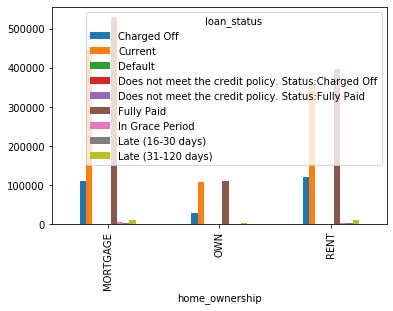

In [259]:
res = pd.crosstab(loanDataCleaned['home_ownership'], loanDataCleaned['loan_status'])
res.plot(kind='bar')

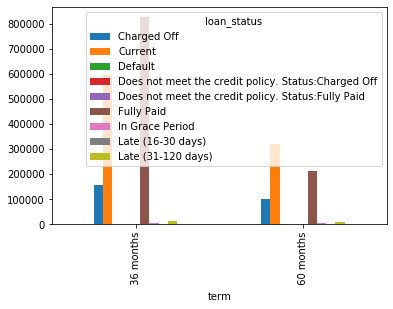

In [260]:
res = pd.crosstab(loanDataCleaned['term'], loanDataCleaned['loan_status'])
res.plot(kind='bar')

Obtaining the correlation matrix for continuous predictors

In [261]:
loancorr = loanDataCleaned.corr()
loancorr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999756,0.999048,0.101455,0.945418,0.448622,0.048232,-0.010062,-0.029150,0.180746,...,-0.023442,-0.027921,0.089703,0.022144,-0.082596,0.005222,0.331868,0.271760,0.367719,0.202045
funded_amnt,0.999756,1.000000,0.999350,0.101474,0.945762,0.448545,0.048436,-0.009953,-0.029437,0.180909,...,-0.023443,-0.027922,0.089702,0.022142,-0.082480,0.005294,0.331868,0.271760,0.367724,0.202044
funded_amnt_inv,0.999048,0.999350,1.000000,0.101510,0.944924,0.448184,0.048952,-0.009806,-0.031319,0.181119,...,-0.023461,-0.027947,0.089726,0.022094,-0.082290,0.005441,0.331898,0.271763,0.367757,0.202050
int_rate,0.101455,0.101474,0.101510,1.000000,0.127493,-0.113278,0.123856,0.058804,0.188503,-0.009716,...,0.033324,0.181919,-0.079013,0.271983,0.056272,0.014174,-0.125033,0.011159,-0.241251,0.001207
installment,0.945418,0.945762,0.944924,0.127493,1.000000,0.429261,0.049710,0.001235,-0.003848,0.169923,...,-0.016991,-0.005252,0.070600,0.045480,-0.074087,0.011755,0.292669,0.252049,0.330096,0.183507
annual_inc,0.448622,0.448545,0.448184,-0.113278,0.429261,1.000000,-0.163997,0.061093,0.044127,0.223818,...,0.011664,0.081690,-0.013082,-0.004534,-0.061290,0.049064,0.550950,0.427955,0.382196,0.376462
dti,0.048232,0.048436,0.048952,0.123856,0.049710,-0.163997,1.000000,-0.011707,-0.011724,0.187766,...,-0.013397,0.045823,0.065343,0.103674,-0.012994,-0.019466,0.042113,0.208382,0.043117,0.229482
delinq_2yrs,-0.010062,-0.009953,-0.009806,0.058804,0.001235,0.061093,-0.011707,1.000000,0.024309,0.049102,...,0.657953,-0.022023,-0.442279,-0.000563,-0.049228,0.011069,0.057999,0.028235,-0.079270,0.056817
inq_last_6mths,-0.029150,-0.029437,-0.031319,0.188503,-0.003848,0.044127,-0.011724,0.024309,1.000000,0.137661,...,0.030152,0.330472,-0.028457,-0.061971,0.074474,0.013603,0.029418,0.036053,-0.005060,0.043105
open_acc,0.180746,0.180909,0.181119,-0.009716,0.169923,0.223818,0.187766,0.049102,0.137661,1.000000,...,0.011045,0.371598,0.109873,-0.088033,-0.015858,-0.005566,0.304878,0.414505,0.384523,0.370590


In [262]:
cont_cols = loancorr.columns
loancorr[loancorr[cont_cols]>0.95]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999756,0.999048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.999756,1.000000,0.999350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.999048,0.999350,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that columns loan_amnt, funded_amnt and funded_amnt_inv are highly (> 95%) correlated, therefore considering only loan_amnt among these

In [263]:
loanDataCleaned.head(2)
highlyCorrCols = ['funded_amnt', 'funded_amnt_inv']
loanDataCleaned.drop(highlyCorrCols, axis=1, inplace=True)
print("Now we have rows, columns as " + str(loanDataCleaned.shape))
cont_cols = [x for x in cont_cols if x not in highlyCorrCols]

Now we have rows, columns as (2248051, 97)


In [264]:
cont_cols = [x for x in cont_cols if x not in highlyCorrCols]

## Splitting data into train and test set

Defining target variable

In [265]:
bad_indicators = ["Charged Off ",
"Charged Off",
"Default",
"Does not meet the credit policy. Status:Charged Off",
"In Grace Period",
"Default Receiver",
"Late (16-30 days)",
"Late (31-120 days)"]
loanDataCleaned['target'] = loanDataCleaned['loan_status'].isin(bad_indicators).astype(int)
loanDataCleaned = loanDataCleaned.fillna(0)

In [266]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
trainX, testX, trainY, testY = train_test_split( loanDataCleaned, loanDataCleaned.target, test_size=0.3, random_state=0)

In [267]:
trainData_cont = trainX[cont_cols]
testData_cont = testX[cont_cols]

In [268]:
#Standarding data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(trainData_cont)
# Apply transform to both the training set and the test set.
trainData_cont = scaler.transform(trainData_cont)
testData_cont = scaler.transform(testData_cont)

Applying PCA on continuos predictors

In [269]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.80)
pca.fit(trainData_cont)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [270]:
print("Before PCA, in training data we have rows, continuous predictors as " + str(trainData_cont.shape))
print("Before PCA, in test data we have rows, continuous predictors as " + str(testData_cont.shape))
trainData_cont = pca.transform(trainData_cont)
testData_cont = pca.transform(testData_cont)
print("After PCA, in training data we have rows, continuous predictors as " + str(trainData_cont.shape))
print("After PCA, in test data we have rows, continuous predictors as " + str(testData_cont.shape))

Before PCA, in training data we have rows, continuous predictors as (1573635, 76)
Before PCA, in test data we have rows, continuous predictors as (674416, 76)
After PCA, in training data we have rows, continuous predictors as (1573635, 25)
After PCA, in test data we have rows, continuous predictors as (674416, 25)


For dimensionality reduction of categorical variables we could group them together based on business understanding as a single categorical variable, for example if according to the business based on certain combination of term, grade and subgrade of loan we have a value for another column say application_type, we could remove term, grade and subgrade and only use application_type for further analysis.

In [271]:
cat_cols = [x for x in loanDataCleaned if x not in cont_cols and x not in ['target', 'loan_status']]
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [272]:
unique[cat_cols]

term                         2
grade                        7
sub_grade                   35
emp_title               512694
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    63155
addr_state                  51
earliest_cr_line           754
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In my analysis, I'll be using only grade, as subgrade is a more granular form of grade itself. I ll also be neglecting dates in my analysis, but month or year can be extracted from date for further analysis. We could extract only month if we would like to incorporate seasonal behaviour in our prediction. We could also break the year or months into buckets of 5 years or 10 years for years and particular quarter (1st quarter Jan to Mar etc.) of the year for months.

For predictors like title and emp_title, we could neglect, entries in our analysis, which are not that frequent. Addr_state can be grouped into wider buckets like regions, North, south, east and west.

Having stated how categorical predictors with large categories could be handled, in my analysis here I am neglecting the above mentioned columns.

For grades, I am bucketing them into 'Above average' for grades in ['A','B','C'] else 'Below Average'

In [273]:
trainX['gradeBucket'] = np.where((trainX['grade'] == 'A') | (trainX['grade'] == 'B') | (trainX['grade'] == 'C'), 'Above_avg', 'Below_avg')
testX['gradeBucket'] = np.where((testX['grade'] == 'A') | (testX['grade'] == 'B') | (testX['grade'] == 'C'), 'Above_avg', 'Below_avg')
cat_cols.append('gradeBucket')

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [274]:
colsToRemove = ['sub_grade', 'emp_title', 'issue_d', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' , 'purpose','emp_length', 'initial_list_status', 'hardship_flag', 'debt_settlement_flag', 'disbursement_method', 'grade']
cat_cols = [x for x in cat_cols if x not in colsToRemove]
unique['gradeBucket'] = 2
unique[cat_cols]

term                   2
home_ownership         6
verification_status    3
pymnt_plan             2
application_type       2
gradeBucket            2
dtype: int64

In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainData_cat = trainX[cat_cols]
testData_cat = testX[cat_cols]
trainData_cat = pd.get_dummies(trainData_cat)
testData_cat = pd.get_dummies(testData_cat)
for c in testData_cat.columns:
    trainData_cat[c] = le.fit_transform(trainData_cat[c])
    testData_cat[c] = le.fit_transform(testData_cat[c])
trainData_cat.head(3)

,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_Individual,application_type_Joint App,gradeBucket_Above_avg,gradeBucket_Below_avg
863264,1,0,1,0,0,0,1,0,1,0,1,0,1,0
761550,0,1,0,0,1,0,0,1,1,0,1,0,0,1
1945987,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [276]:
trainData_cont = pd.DataFrame(trainData_cont)
testData_cont = pd.DataFrame(testData_cont)

In [277]:
trainData = pd.concat([trainData_cont.reset_index(drop=True), trainData_cat.reset_index(drop=True)], axis=1)
testData = pd.concat([testData_cont.reset_index(drop=True), testData_cat.reset_index(drop=True)], axis=1)

In [278]:
trainData.shape

(1573635, 39)

## Calculating Feature importance

In [279]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=15,
                              random_state=0)

forest.fit(trainData, trainY)
importances = forest.feature_importances_

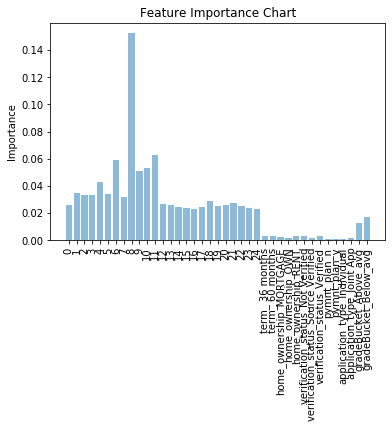

In [280]:
plt.bar(np.arange(len(list(trainData.columns))), importances, align='center', alpha=0.5)
plt.xticks(np.arange(len(list(trainData.columns))), list(trainData.columns.values), rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importance Chart')
plt.show()

In [281]:
lessImpFeatures = list(trainData.columns[np.where(importances < 0.002)])
lessImpFeatures

['home_ownership_OWN',
 'verification_status_Source Verified',
 'pymnt_plan_n',
 'pymnt_plan_y',
 'application_type_Individual',
 'application_type_Joint App']

Dropping features having importance < 0.002

In [282]:
trainData.drop(lessImpFeatures, axis=1, inplace=True)
testData.drop(lessImpFeatures, axis=1, inplace=True)

## Training xgboost model

In [283]:
import xgboost as xgb
# fit model no training data

trainData_tofit = trainData.as_matrix()
testData_tofit = testData.as_matrix()
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=15, learning_rate=0.3, objective="binary:logistic").fit(trainData_tofit, trainY)
predictions = gbm.predict(testData_tofit)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [284]:
accuracy_score(testY, predictions)

0.9206009347346444

The models accuracy is 92%. It can be improved by adjusting the hyperparameters (namely, max_depth, n_estimators and learning_rate) appropriately. Too large values of hyperparameters would result in overfitting, and smaller values would impact accuracy of the model, therefore they have to be chosen appropriately.